In [1]:
from bs4 import BeautifulSoup as bs
import urllib.request as urllib
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 8

In [3]:
linkKholi = "http://stats.espncricinfo.com/ci/engine/player/253802.html?class=2;orderby=start;orderbyad=reverse;template=results;type=allround;view=match"

In [4]:
linkSharma = "http://stats.espncricinfo.com/ci/engine/player/34102.html?class=2;orderby=start;orderbyad=reverse;template=results;type=allround;view=match"

In [6]:
html = urllib.urlopen(linkKholi)
soup = bs(html,'html.parser')
# print(soup.prettify())

In [7]:
viratParsed = soup.findAll('table')[3].findAll('tr')

In [8]:
virat = {}
for item in viratParsed[1:]:
    viratScore = item.findAll('td')[0].contents[0].strip('*')
    odiNumber = (item.findAll('td')[-1].contents[0].contents[0]).split('#')[1].strip(' ')
    virat[odiNumber] = viratScore

In [9]:
html = urllib.urlopen(linkSharma)
soup = bs(html,'html.parser')

In [10]:
sharmaParsed = soup.findAll('table')[3].findAll('tr')

In [11]:
sharma = {}
for item in sharmaParsed[1:]:
    sharmaScore = item.findAll('td')[0].contents[0].strip('*')
    odiNumber = (item.findAll('td')[-1].contents[0].contents[0]).split('#')[1].strip(' ')
    sharma[odiNumber] = sharmaScore

In [12]:
vScore = []
sScore = []
sOdiNumber = []
for key in virat:
    if key in sharma:
        if virat[key] == 'DNB' or virat[key] == 'TDNB' or sharma[key] == 'DNB' or sharma[key] == 'TDNB':
            continue
        vScore.append(virat[key])
        sScore.append(sharma[key])
        sOdiNumber.append(key)

In [13]:
df = pd.DataFrame({'Virat Kholi':vScore})

In [14]:
df['Rohit Sharma'] = sScore
df['ODI'] = sOdiNumber

In [15]:
df.head()

,Virat Kholi,Rohit Sharma,ODI
0,60,62,4088
1,43,87,4085
2,45,11,4082
3,46,9,4079
4,104,43,4078


In [16]:
df=df.astype(float)

In [17]:
dfS = df.sort_values('Rohit Sharma')[-20:]

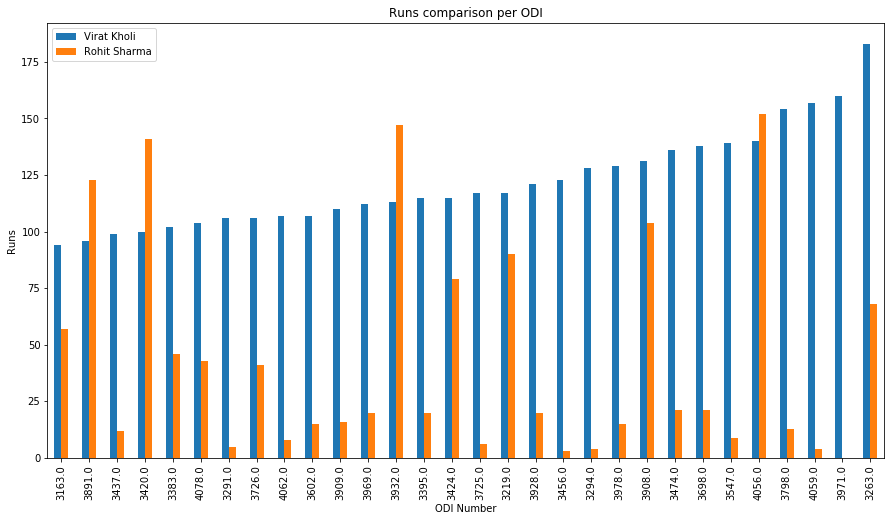

In [22]:
dfS.plot.bar('ODI',y=['Virat Kholi', 'Rohit Sharma'])
plt.xlabel('ODI Number')
plt.ylabel('Runs')
plt.title('Runs comparison per ODI')
plt.show()

In [25]:
dfS = df.sort_values('Virat Kholi')[-20:]

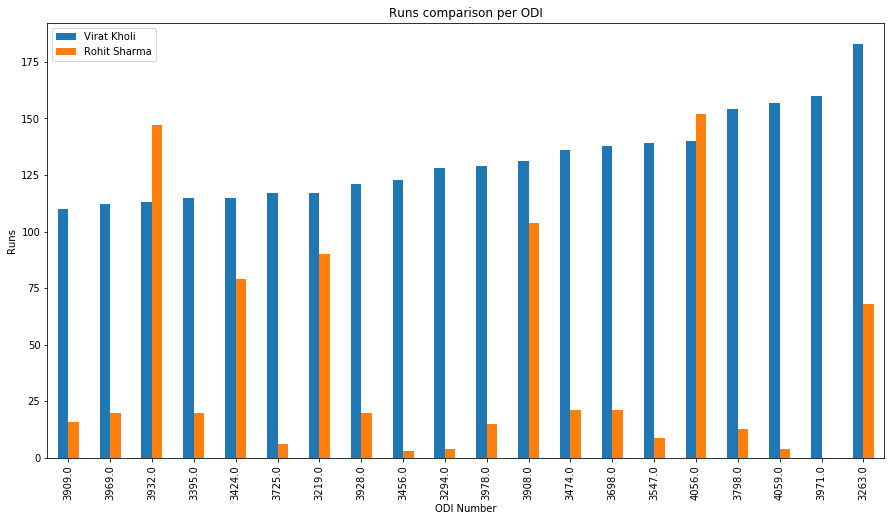

In [26]:
dfS.plot.bar('ODI',y=['Virat Kholi', 'Rohit Sharma'])
plt.xlabel('ODI Number')
plt.ylabel('Runs')
plt.title('Runs comparison per ODI')
plt.show()